# Data Description

# Importing The Libraries

In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
# importing in the dataset
df = pd.read_csv('InsuranceClaimFraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# description on the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [4]:
# inforamtion on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
# colums of the dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
 df.shape

(1000, 40)

In [7]:
# check for any missing or dirty data in the dataset.
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

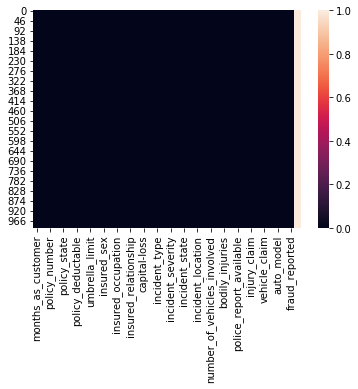

In [8]:
sns.heatmap(df.isna())

We see that all the values in c_39 are null

# Checking Correlation

In [9]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


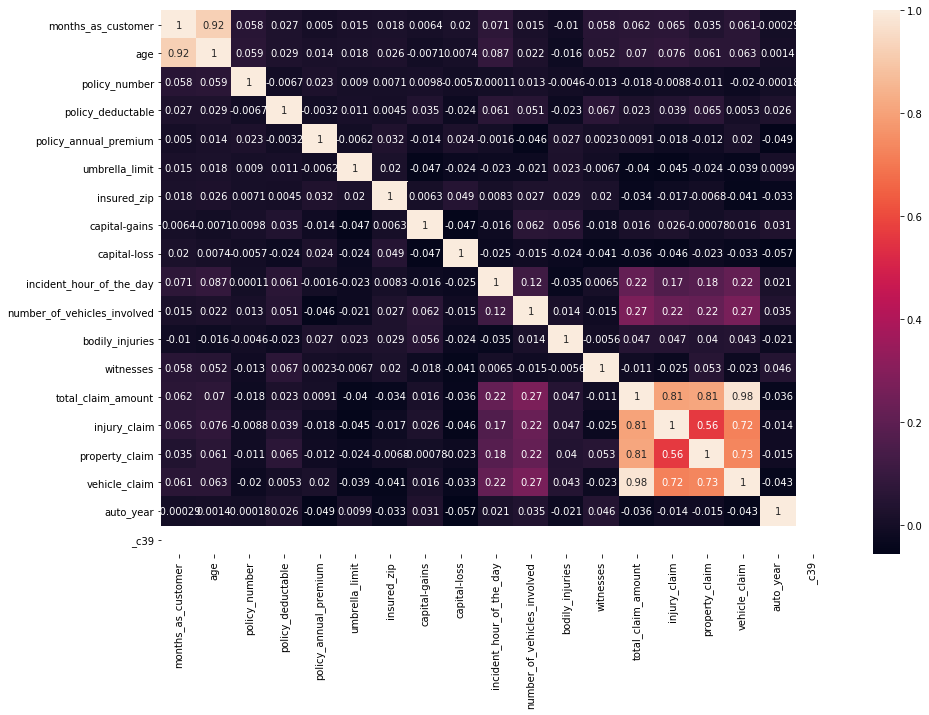

In [10]:
# visualizing the correlations
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

<b>Removing the Redundant Columns which have no impact on Fraud Detection</b>

In [11]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [12]:
redundant_cols = ['policy_number','policy_csl','policy_bind_date','policy_state','insured_relationship','insured_hobbies','incident_date','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','_c39']

In [13]:
df1 = df.drop(redundant_cols,1)

In [14]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,466132,MALE,MD,craft-repair,53300,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,0,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,5000000,430632,FEMALE,PhD,sales,35100,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,48900,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,6000000,610706,MALE,Associate,sales,66000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [15]:
df1.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [16]:
df1.shape

(1000, 26)

* We have reduced the featrures to 26 by removing the redundant columns.

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   months_as_customer       1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   policy_deductable        1000 non-null   int64  
 3   policy_annual_premium    1000 non-null   float64
 4   umbrella_limit           1000 non-null   int64  
 5   insured_zip              1000 non-null   int64  
 6   insured_sex              1000 non-null   object 
 7   insured_education_level  1000 non-null   object 
 8   insured_occupation       1000 non-null   object 
 9   capital-gains            1000 non-null   int64  
 10  capital-loss             1000 non-null   int64  
 11  incident_type            1000 non-null   object 
 12  collision_type           1000 non-null   object 
 13  incident_severity        1000 non-null   object 
 14  property_damage          

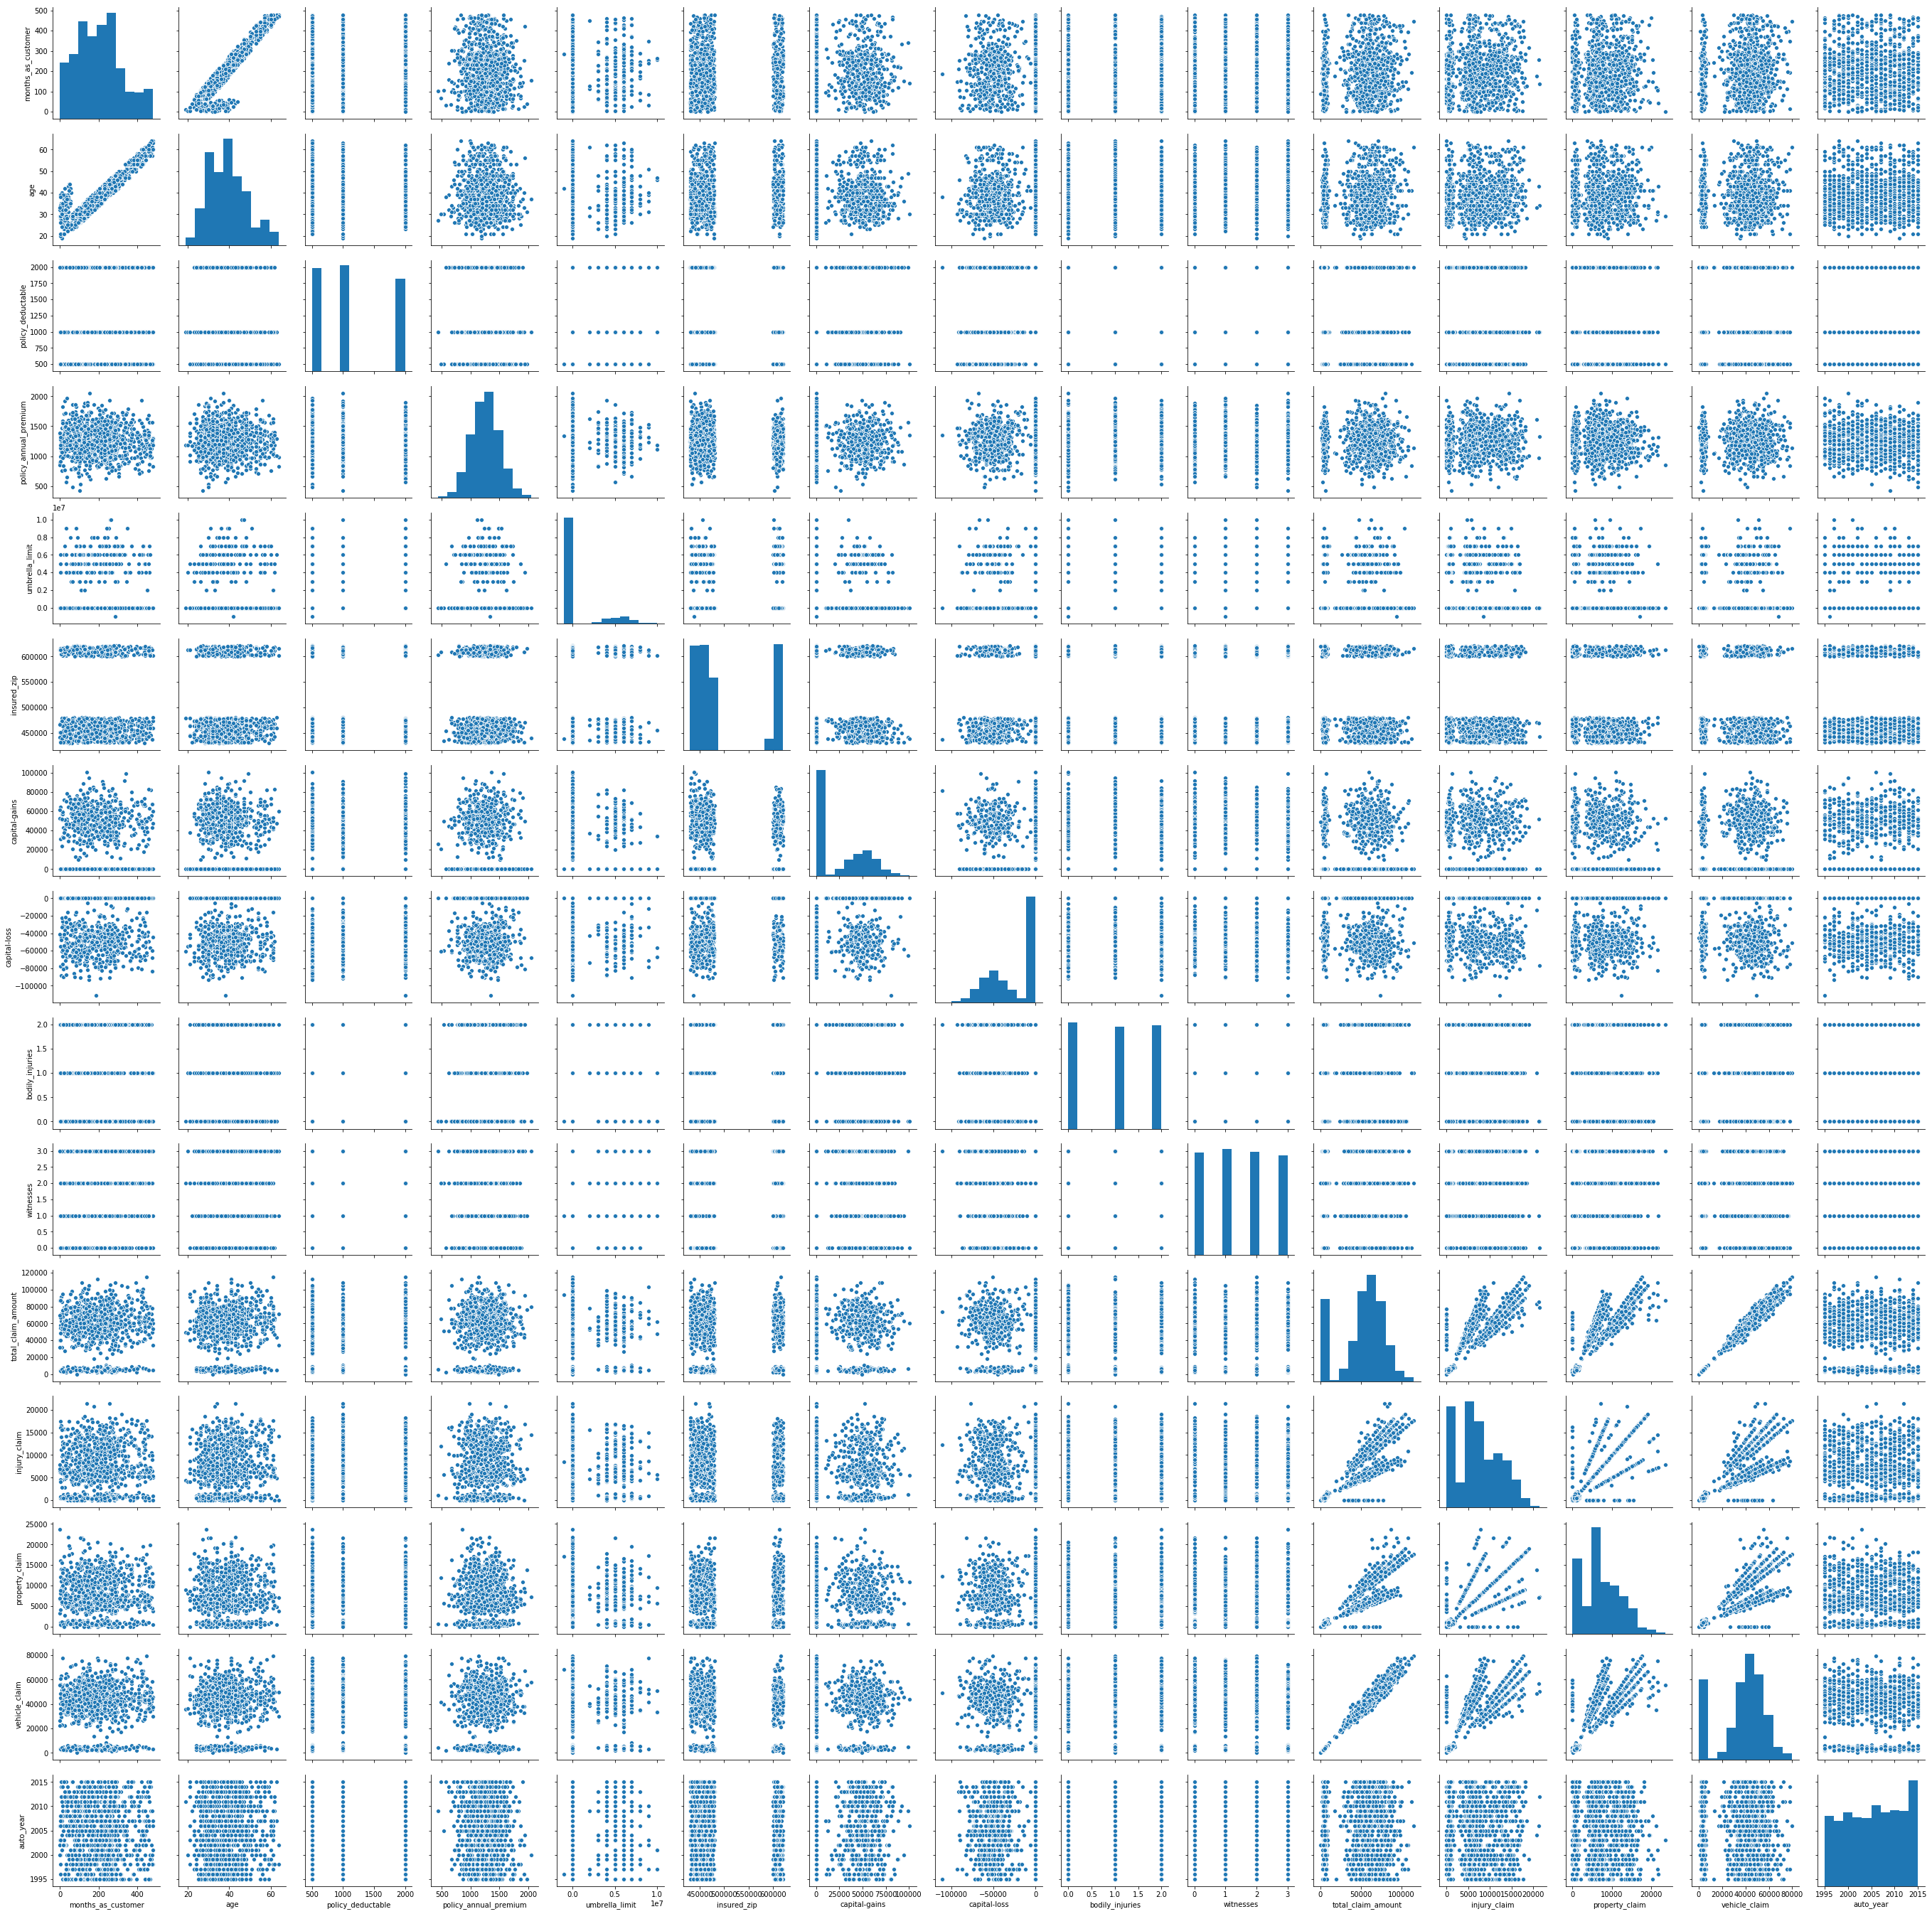

In [18]:
sns.pairplot(df1)

In [19]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,466132,MALE,MD,craft-repair,53300,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,0,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,5000000,430632,FEMALE,PhD,sales,35100,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,48900,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,6000000,610706,MALE,Associate,sales,66000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


* We can see that there are some ? values in the data, let's replace them with np.nan

In [20]:
df1 = df1.replace('?',np.nan)

In [21]:
# now let's recheck for the missing values

In [22]:
df1.isna().sum()

months_as_customer           0
age                          0
policy_deductable            0
policy_annual_premium        0
umbrella_limit               0
insured_zip                  0
insured_sex                  0
insured_education_level      0
insured_occupation           0
capital-gains                0
capital-loss                 0
incident_type                0
collision_type             178
incident_severity            0
property_damage            360
bodily_injuries              0
witnesses                    0
police_report_available    343
total_claim_amount           0
injury_claim                 0
property_claim               0
vehicle_claim                0
auto_make                    0
auto_model                   0
auto_year                    0
fraud_reported               0
dtype: int64

We see that now collision_type, property_damage, police_report_available have null values 

We know that collision_type, property_damage, police_report_available are categorical data types, so we will do operations on these null values later

## Univariate analysis.

## Policy deductable:

In [23]:
df.policy_deductable.value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

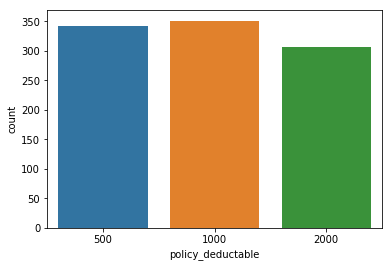

In [24]:
sns.countplot(df1.policy_deductable)

## Annual policy premium

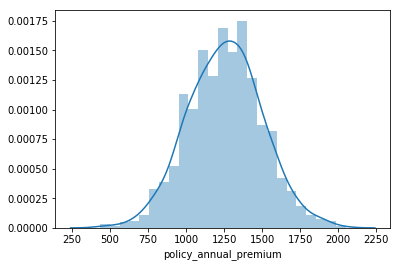

In [25]:
sns.distplot(df1.policy_annual_premium)

## Umbrella limit

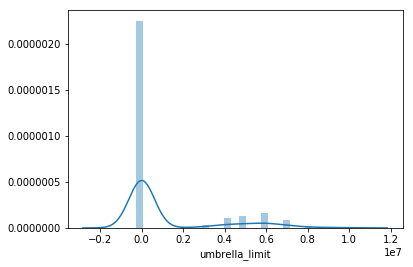

In [26]:
sns.distplot(df1.umbrella_limit)

In [27]:
df1.umbrella_limit.value_counts()/len(df) * 100

 0           79.8
 6000000      5.7
 5000000      4.6
 4000000      3.9
 7000000      2.9
 3000000      1.2
 8000000      0.8
 9000000      0.5
 2000000      0.3
 10000000     0.2
-1000000      0.1
Name: umbrella_limit, dtype: float64

We have around 80 percent of missing data which is in the form of 0 in the umberlla limit, thus we will be dropping this column

In [28]:
df1.drop('umbrella_limit',1,inplace=True)

In [29]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,466132,MALE,MD,craft-repair,53300,0,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,468176,MALE,MD,machine-op-inspct,0,0,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,430632,FEMALE,PhD,sales,35100,0,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,608117,FEMALE,PhD,armed-forces,48900,-62400,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,610706,MALE,Associate,sales,66000,-46000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### Insured_zip

In [30]:
df1.insured_zip = df1.insured_zip.apply(lambda x: 1 if x > 500000 else 0)
df1.rename(columns={'insured_zip':'insured_zip_above_5L'},inplace=True)

In [31]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip_above_5L,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,MALE,MD,craft-repair,53300,0,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,0,MALE,MD,machine-op-inspct,0,0,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,0,FEMALE,PhD,sales,35100,0,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,1,FEMALE,PhD,armed-forces,48900,-62400,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,1,MALE,Associate,sales,66000,-46000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## capital gains and capital loss

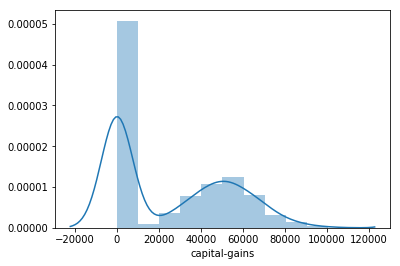

In [32]:
sns.distplot(df1['capital-gains'])

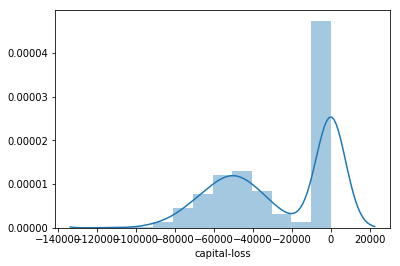

In [33]:
sns.distplot(df1['capital-loss'])

* The value of capital gains can be zero as Capital gain is an increase in a capital asset's value. It is considered to be realized when you sell the asset.If you sell the asset at the same price you bought then your capital gains will be zero.
* Similar is the capital loss.

In [34]:
# bodily injuries.

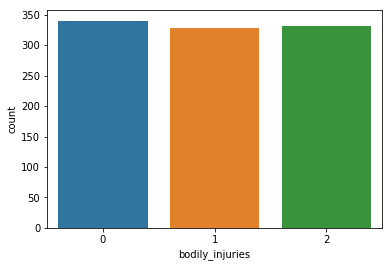

In [35]:
sns.countplot(df1.bodily_injuries)

In [36]:
# police report available

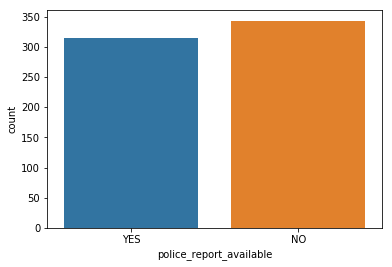

In [37]:
sns.countplot(df1.police_report_available)

In [38]:
df1.police_report_available.isna().sum()

343

* Containes missing values.

## property damage.

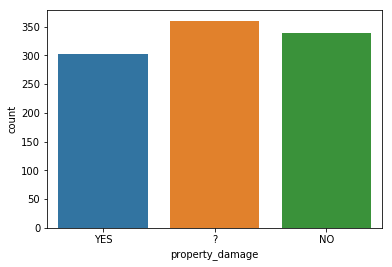

In [39]:
sns.countplot(df.property_damage)

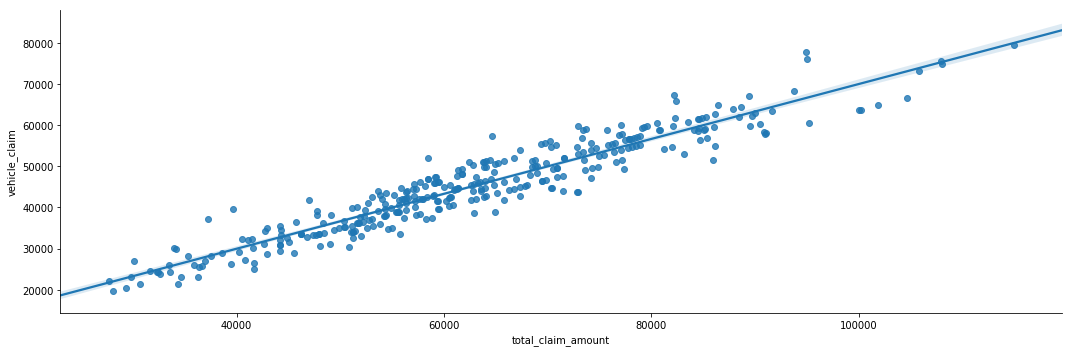

In [40]:
sns.lmplot('total_claim_amount','vehicle_claim',data=df1.dropna(),aspect=3)

In [41]:
df1

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip_above_5L,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,MALE,MD,craft-repair,53300,0,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,0,MALE,MD,machine-op-inspct,0,0,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,0,FEMALE,PhD,sales,35100,0,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,1,FEMALE,PhD,armed-forces,48900,-62400,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,1,MALE,Associate,sales,66000,-46000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,FEMALE,Masters,craft-repair,0,0,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,1000,1436.79,1,FEMALE,PhD,prof-specialty,70900,0,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,500,1383.49,0,FEMALE,Masters,armed-forces,35100,0,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2000,1356.92,0,MALE,Associate,handlers-cleaners,0,0,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


## Addressing the missing value.

In [42]:
df1

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip_above_5L,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,MALE,MD,craft-repair,53300,0,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2000,1197.22,0,MALE,MD,machine-op-inspct,0,0,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000,1413.14,0,FEMALE,PhD,sales,35100,0,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,2000,1415.74,1,FEMALE,PhD,armed-forces,48900,-62400,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,1000,1583.91,1,MALE,Associate,sales,66000,-46000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,FEMALE,Masters,craft-repair,0,0,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,1000,1436.79,1,FEMALE,PhD,prof-specialty,70900,0,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,500,1383.49,0,FEMALE,Masters,armed-forces,35100,0,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2000,1356.92,0,MALE,Associate,handlers-cleaners,0,0,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


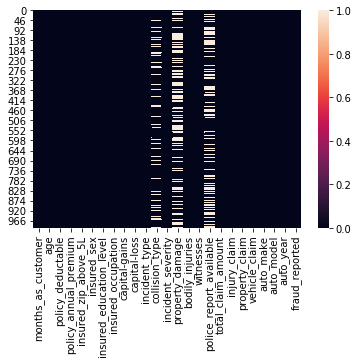

In [43]:
sns.heatmap(df1.isna())

In [44]:
df1.isna().sum()

months_as_customer           0
age                          0
policy_deductable            0
policy_annual_premium        0
insured_zip_above_5L         0
insured_sex                  0
insured_education_level      0
insured_occupation           0
capital-gains                0
capital-loss                 0
incident_type                0
collision_type             178
incident_severity            0
property_damage            360
bodily_injuries              0
witnesses                    0
police_report_available    343
total_claim_amount           0
injury_claim                 0
property_claim               0
vehicle_claim                0
auto_make                    0
auto_model                   0
auto_year                    0
fraud_reported               0
dtype: int64

In [45]:
df1.isna().mean()

months_as_customer         0.000
age                        0.000
policy_deductable          0.000
policy_annual_premium      0.000
insured_zip_above_5L       0.000
insured_sex                0.000
insured_education_level    0.000
insured_occupation         0.000
capital-gains              0.000
capital-loss               0.000
incident_type              0.000
collision_type             0.178
incident_severity          0.000
property_damage            0.360
bodily_injuries            0.000
witnesses                  0.000
police_report_available    0.343
total_claim_amount         0.000
injury_claim               0.000
property_claim             0.000
vehicle_claim              0.000
auto_make                  0.000
auto_model                 0.000
auto_year                  0.000
fraud_reported             0.000
dtype: float64

The missing values in the feautres police_report_available and property_damage are more tan 35 percent , so its better to completely remove those 2 columns.

In [46]:
df1.drop(['property_damage','police_report_available'],1,inplace=True)

In [47]:
df1.isna().sum()

months_as_customer           0
age                          0
policy_deductable            0
policy_annual_premium        0
insured_zip_above_5L         0
insured_sex                  0
insured_education_level      0
insured_occupation           0
capital-gains                0
capital-loss                 0
incident_type                0
collision_type             178
incident_severity            0
bodily_injuries              0
witnesses                    0
total_claim_amount           0
injury_claim                 0
property_claim               0
vehicle_claim                0
auto_make                    0
auto_model                   0
auto_year                    0
fraud_reported               0
dtype: int64

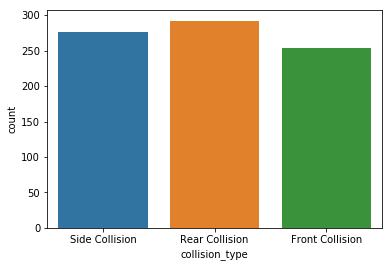

In [48]:
sns.countplot(df1.collision_type)

In [49]:
# addressing the collision type.

In [50]:
# let's keep the data and label it as missing data.

# Encode the Data

In [51]:
df1.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'insured_zip_above_5L', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [52]:
cols=['insured_sex',
       'insured_education_level','insured_occupation','incident_type', 'collision_type', 'incident_severity', 'auto_make',
       'auto_model','fraud_reported']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols: 
    df1[i]=le.fit_transform(df1[i]) 

In [53]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip_above_5L,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,1000,1406.91,0,1,4,2,53300,0,...,1,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,2000,1197.22,0,1,4,6,0,0,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2000,1413.14,0,0,6,11,35100,0,...,2,3,34650,7700,3850,23100,4,30,2007,0
3,256,41,2000,1415.74,1,0,6,1,48900,-62400,...,1,2,63400,6340,6340,50720,3,34,2014,1
4,228,44,1000,1583.91,1,1,0,11,66000,-46000,...,0,1,6500,1300,650,4550,0,31,2009,0


# Outliers Removal

In [54]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(1000, 23)

In [55]:
threshold=3
print(np.where(z>3))

(array([229, 248, 500, 763, 807], dtype=int64), array([ 3,  3, 17,  3,  9], dtype=int64))


In [56]:
df1_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df1_new.shape)

(1000, 23)
(995, 23)


### Percent Data Loss

In [57]:
loss_percent=((1000-995)/1000)*100
loss_percent

0.5

0.5% Data Loss we will take into account

# Skewness

In [58]:
df1_new.skew()

months_as_customer         0.358958
age                        0.473974
policy_deductable          0.475849
policy_annual_premium      0.033107
insured_zip_above_5L       0.913845
insured_sex                0.143294
insured_education_level    0.001403
insured_occupation        -0.061818
capital-gains              0.479472
capital-loss              -0.379708
incident_type              0.101056
collision_type             0.125885
incident_severity          0.274925
bodily_injuries            0.012979
witnesses                  0.027371
total_claim_amount        -0.591848
injury_claim               0.270253
property_claim             0.359528
vehicle_claim             -0.618189
auto_make                 -0.019739
auto_model                -0.083472
auto_year                 -0.049758
fraud_reported             1.173586
dtype: float64

## Splitting x and y

In [59]:
x = df1_new.drop('fraud_reported',axis=1)
y = df1_new['fraud_reported']

In [60]:
# check the shape
x.shape,y.shape

((995, 22), (995,))

# Finding Best Random State

In [61]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8241206030150754 on Random_State 78


Best Accuracy is obtained at random_state=78, therefore we will use random_state=78

# Train Test split

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=78)

# Training the model.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [65]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.8241206030150754
[[164   0]
 [ 35   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       164
           1       0.00      0.00      0.00        35

    accuracy                           0.82       199
   macro avg       0.41      0.50      0.45       199
weighted avg       0.68      0.82      0.74       199

Cross Validation Score: 0.7517587939698492
Difference Between Accuracy Score and CrossValidation Score: 0.07236180904522616


Accuracy score: of SVC()
0.8241206030150754
[[164   0]
 [ 35   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       164
           1       0.00      0.00      0.00        35

    accuracy                           0.82       199
   macro avg       0.41      0.50      0.45       199
weighted avg       0.68      0.82      0.74       199

Cross Validation Score: 0.7527638190954773
Difference Between Accuracy 

Difference Between Accuracy Score and CrossValidation Score is Minimum for Decision Tree Classifier, So we will use this model to train our model

# HyperParameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV
#Creating parameter list to pass in GridSearchCV
parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [67]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [68]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [69]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [70]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [71]:
accuracy_score(y_test,GCV_pred)

0.8190954773869347

In [72]:
dtc1=DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
dtc1.fit(x_train,y_train)
pred=dtc1.predict(x_test)
print('Accuracy score: of',dtc1)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: of DecisionTreeClassifier(criterion='entropy', max_depth=2)
0.8190954773869347
[[140  24]
 [ 12  23]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       164
           1       0.49      0.66      0.56        35

    accuracy                           0.82       199
   macro avg       0.71      0.76      0.72       199
weighted avg       0.85      0.82      0.83       199



# Saving The Model

In [74]:
import joblib

In [75]:
joblib.dump(dtc1,'insurance_fraud.obj')

['insurance_fraud.obj']